In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from astropy.constants import au, R_sun, R_jup, R_earth, au


In [2]:
data_labeled_selected = pd.read_csv('data_labeled_selected.csv')
data_labeled_selected

,target,satellite,label,index,filename,view,period,t0,star_radius,k,aos,i,e,w,ldcs_1,ldcs_2,n_points_transit
0,HD102249,BHr,PC,0,0_curve_HD102249_BHr.npy,Curve,2.485603,1506.040641,3.47246,0.032584,3.100417,1.541473,0.0,0.0,0.32,0.07,2076
1,HD102249,BHr,PC,0,0_fold_HD102249_BHr.npy,PhaseFold,2.485603,1506.040641,3.47246,0.032584,3.100417,1.541473,0.0,0.0,0.32,0.07,2076
2,HD102249,BHr,PC,0,0_global_HD102249_BHr.npy,Global,2.485603,1506.040641,3.47246,0.032584,3.100417,1.541473,0.0,0.0,0.32,0.07,2076
3,HD102249,BHr,PC,0,0_local_HD102249_BHr.npy,Local,2.485603,1506.040641,3.47246,0.032584,3.100417,1.541473,0.0,0.0,0.32,0.07,2076
4,HD102249,BHr,PC,19,19_curve_HD102249_BHr.npy,Curve,4.751788,1457.811459,3.47246,0.038840,4.774851,1.539857,0.0,0.0,0.31,0.09,1487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40874,HD93194,BHr,NOT_PC,21219,21219_global_HD93194_BHr.npy,Global,2.154236,3303.658707,3.40000,0.032684,2.861204,1.565683,0.0,0.0,NaN,NaN,4724
40875,HD93194,BHr,NOT_PC,21219,21219_local_HD93194_BHr.npy,Local,2.154236,3303.658707,3.40000,0.032684,2.861204,1.565683,0.0,0.0,NaN,NaN,4724
40876,HD93194,BHr,NOT_PC,21221,21221_fold_HD93194_BHr.npy,PhaseFold,3.516998,3334.659985,3.40000,0.056737,3.967053,1.549809,0.0,0.0,NaN,NaN,4724
40877,HD93194,BHr,NOT_PC,21221,21221_global_HD93194_BHr.npy,Global,3.516998,3334.659985,3.40000,0.056737,3.967053,1.549809,0.0,0.0,NaN,NaN,4724


In [80]:
planet_radius_array = data_labeled_selected[(data_labeled_selected["view"] == "Global")&(data_labeled_selected["label"] == "PC")]["planet_radius"].copy()

In [81]:
print(np.max(planet_radius_array))
print(np.min(planet_radius_array))

2.097910301607317
0.46542214095506185


In [83]:
planet_radius_array[planet_radius_array>=0.89].shape[0] / planet_radius_array.shape[0]

0.9315332690453231

In [84]:
planet_radius_array[planet_radius_array>=2.05].shape[0] / planet_radius_array.shape[0]

0.04580520732883317

In [3]:
query_to_mast = pd.read_csv('query_to_mast.csv', header =1)
query_to_mast

,Name,RA,DEC
0,HD 030652,72.460047,6.961278
1,HD 056456,108.658919,-48.271928
2,HD 071935,126.902441,-53.088479
3,HD 074753,130.917804,-49.822801
4,HD 093308,161.264774,-59.684431
...,...,...,...
531,HD 096918,167.147458,-58.975038
532,HD 096919,167.141658,-61.947176
533,HD 097670,168.378261,-59.619317
534,HD 098718,170.251692,-54.491018


In [4]:
print(np.unique(data_labeled_selected["target"]).shape)
print(np.unique(data_labeled_selected["target"]))

(100,)
['HD102249' 'HD102776' 'HD105211' 'HD105435' 'HD106983' 'HD110879'
 'HD111123' 'HD112078' 'HD112092' 'HD114911' 'HD118716' 'HD122451'
 'HD12311' 'HD128620' 'HD128621' 'HD128898' 'HD136664' 'HD159492'
 'HD160032' 'HD16620' 'HD16970' 'HD172167' 'HD173648' 'HD176687'
 'HD177196' 'HD178253' 'HD178449' 'HD183056' 'HD18331' 'HD184006'
 'HD18543' 'HD186155' 'HD18633' 'HD189178' 'HD19107' 'HD191610' 'HD192640'
 'HD192685' 'HD19356' 'HD195068' 'HD198183' 'HD198639' 'HD201092'
 'HD201433' 'HD201601' 'HD20320' 'HD20395' 'HD204188' 'HD205924' 'HD20630'
 'HD207223' 'HD207652' 'HD209790' 'HD210074' 'HD210129' 'HD211336'
 'HD213617' 'HD214168' 'HD217014' 'HD217891' 'HD218045' 'HD218396'
 'HD219134' 'HD22049' 'HD22468' 'HD22484' 'HD22634' 'HD23249' 'HD24863'
 'HD25346' 'HD27290' 'HD27459' 'HD27463' 'HD27628' 'HD27934' 'HD28052'
 'HD29305' 'HD30478' 'HD30652' 'HD36653' 'HD36861' 'HD38899' 'HD39060'
 'HD39587' 'HD40183' 'HD40312' 'HD432' 'HD46328' 'HD54118' 'HD54893'
 'HD55892' 'HD56022' 'HD61068

In [5]:
target_names = ["D ".join(name.split("D")) for name in np.unique(data_labeled_selected["target"]) ]

In [6]:
not_found_in_mast_query = []

for name in np.unique(data_labeled_selected["target"]):
    star_id = name.split("HD")[1]    
    diff = 6 - len(star_id)# for example HD 123 to HD 000123
    star_id = f"HD {diff*'0'+star_id}" 
    #print(star_id)
    if (star_id not in query_to_mast["Name"].values):
        not_found_in_mast_query.append(star_id)
  

In [7]:
not_found_in_mast_query

[]

## Using TIC

In [8]:
#The following lines beginning with # are comments. Readable columns names and datatypes are provided as informational comment lines in addition to the database column names.
#If you want to re-upload this table import it as a Generic Table with these header lines unmodified.
#Name, RA, DEC, MatchID, MatchRa, MatchDEC, dstArcSec, Version, HIP, TYC ID, UCAC ID, 2MASS ID, SDSS ID, ALLWISE ID, GAIA ID, APASS ID, KIC ID, Object Type, Source of Type, Source of Position, pmRA, pmRA Err., pmDEC, pmDec Err., PM Flag, Parallax, Parallax Err., Source of Parallax, Gal. Long., Gal. Lat., Ecl. Long., Ecl. Lat., B Mag., B Mag. Err., V Mag., V Mag. Err., u Mag., u Mag. Err., g Mag., g Mag. Err., r Mag., r Mag. Err., i Mag., i Mag. Err., z Mag., z Mag. Err., J Mag., J Mag. Err., H Mag., H Mag. Err., K Mag., K Mag. Err., TWOMflag, prox, W1 Mag., W1 Mag. Err., W2 Mag., W2 Mag. Err., W3 Mag., W3 Mag. Err., W4 Mag., W4 Mag. Err., GAIA G Mag., GAIA G Mag. Err., TESS Mag., TESS Mag. Err., TESS Flag, Stellar Properties Flag, T_eff, T_eff Err., log(g), log(g) Err., Metallicity, Metallicity Err., Stellar Radius, Stellar Radius Err., Stellar Mass, Stellar Mass Err., Stellar Density, Stellar Density Err., Luminosity Class from RPM, Stellar Luminosity, Stellar Luminosity Err., Distance, Distance Err., E(B-V), E(B-V) Err., Num. Sources in Aper., Contam. Ratio, Disposition, duplicate_id, priority, eneg_EBV, epos_EBV, EBVflag, eneg_Mass, epos_Mass, eneg_Rad, epos_Rad, eneg_rho, epos_rho, eneg_logg, epos_logg, eneg_lum, epos_lum, eneg_dist, epos_dist, distflag, eneg_Teff, epos_Teff, TeffFlag, gaiabp, e_gaiabp, gaiarp, e_gaiarp, gaiaqflag, starchareFlag, VmagFlag, BmagFlag, splists, e_RA, e_Dec, RA_orig, Dec_orig, e_RA_orig, e_Dec_orig, raddflag, wdflag, selected
#@string, ra, dec, string, float, float, float, string, string, string, string, string, string, string, string, string, string, string, string, string, float, float, float, float, string, float, float, string, float, float, float, float, float, float, float, float, float, float, float, float, float, float, float, float, float, float, float, float, float, float, float, float, string, float, float, float, float, float, float, float, float, float, float, float, float, float, string, string, float, float, float, float, float, float, float, float, float, float, float, float, string, float, float, float, float, float, float, int, float, string, string, float, float, float, string, float, float, float, float, float, float, float, float, float, float, float, float, string, float, float, string, float, float, float, float, int, string, string, string, string, float, float, float, float, float, float, int, int, string

TIC_query = pd.read_csv("MAST_Crossmatch_TIC.csv")

In [9]:

target_names = []
for name in np.unique(data_labeled_selected["target"]):
    star_id = name.split("HD")[1]    
    diff = 6 - len(star_id)# for example HD 123 to HD 000123
    star_id = f"HD {diff*'0'+star_id}"     
    if (star_id not in TIC_query["Name"].values):
        print("not found, ", star_id)
    else:
        target_names.append(star_id)
        
print(len(target_names))

100


In [10]:
selected_query = TIC_query[TIC_query['Name'].isin(target_names)]

In [11]:
print(selected_query.shape)
selected_query.head()


(109, 129)


,Name,RA,DEC,MatchID,MatchRa,MatchDEC,dstArcSec,version,HIP,TYC,...,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,_selected_
5,HD 022468,54.197046,0.587761,311092804,54.197046,0.587761,0.001151,20190415,16846.0,0064-01568-1,...,NaN,2.031286,1.825092,54.196905,0.587064,0.068235,0.054173,0,0,False
19,HD 056022,108.305627,-45.182738,134500902,108.305628,-45.182738,0.002054,20190415,34899.0,8119-01757-1,...,NaN,4.040313,3.789962,108.305474,-45.183114,0.113280,0.120050,1,0,False
23,HD 189178,299.307782,40.367826,171977235,299.307782,40.367825,0.002358,20190415,98194.0,3141-03693-1,...,NaN,2.777704,3.149034,299.307820,40.367827,0.079311,0.111974,-1,0,False
27,HD 019107,46.068820,-7.600855,23137804,46.068821,-7.600855,0.002602,20190415,14293.0,5294-01195-1,...,NaN,3.355586,3.497569,46.069113,-7.600779,0.115219,0.117160,1,0,False
30,HD 071935,126.902441,-53.088479,140349824,126.902440,-53.088479,0.002654,20190415,41483.0,8568-03119-1,...,NaN,4.598427,4.405054,126.901960,-53.088369,0.111645,0.126416,1,0,False


In [12]:
info = ["Name","RA","DEC","MatchID","MatchRa","MatchDEC","dstArcSec","Version","HIP","TYC ID","UCAC ID","2MASS ID","SDSS ID","ALLWISE ID","GAIA ID","APASS ID","KIC ID","Object Type","Source of Type","Source of Position","pmRA","pmRA Err.","pmDEC","pmDec Err.","PM Flag","Parallax","Parallax Err.","Source of Parallax","Gal. Long.","Gal. Lat.","Ecl. Long.","Ecl. Lat.","B Mag.","B Mag. Err.","V Mag.","V Mag. Err.","u Mag.","u Mag. Err.","g Mag.","g Mag. Err.","r Mag.","r Mag. Err.","i Mag.","i Mag. Err.","z Mag.","z Mag. Err.","J Mag.","J Mag. Err.","H Mag.","H Mag. Err.","K Mag.","K Mag. Err.","TWOMflag","prox","W1 Mag.","W1 Mag. Err.","W2 Mag.","W2 Mag. Err.","W3 Mag.","W3 Mag. Err.","W4 Mag.","W4 Mag. Err.","GAIA G Mag.","GAIA G Mag. Err.","TESS Mag.","TESS Mag. Err.","TESS Flag","Stellar Properties Flag","T_eff","T_eff Err.","log(g)","log(g) Err.","Metallicity","Metallicity Err.","Stellar Radius","Stellar Radius Err.","Stellar Mass","Stellar Mass Err.","Stellar Density","Stellar Density Err.","Luminosity Class from RPM","Stellar Luminosity","Stellar Luminosity Err.","Distance","Distance Err.","E(B-V)","E(B-V) Err.","Num. Sources in Aper.","Contam. Ratio","Disposition","duplicate_id","priority","eneg_EBV","epos_EBV","EBVflag","eneg_Mass","epos_Mass","eneg_Rad","epos_Rad","eneg_rho","epos_rho","eneg_logg","epos_logg","eneg_lum","epos_lum","eneg_dist","epos_dist","distflag","eneg_Teff","epos_Teff","TeffFlag","gaiabp","e_gaiabp","gaiarp","e_gaiarp","gaiaqflag","starchareFlag","VmagFlag","BmagFlag","splists","e_RA","e_Dec","RA_orig","Dec_orig","e_RA_orig","e_Dec_orig","raddflag","wdflag","selected"]
for i, col in enumerate(selected_query.columns):
    print(col, "|info -> ", info[i])

Name |info ->  Name
RA |info ->  RA
DEC |info ->  DEC
MatchID |info ->  MatchID
MatchRa |info ->  MatchRa
MatchDEC |info ->  MatchDEC
dstArcSec |info ->  dstArcSec
version |info ->  Version
HIP |info ->  HIP
TYC |info ->  TYC ID
UCAC |info ->  UCAC ID
TWOMASS |info ->  2MASS ID
SDSS |info ->  SDSS ID
ALLWISE |info ->  ALLWISE ID
GAIA |info ->  GAIA ID
APASS |info ->  APASS ID
KIC |info ->  KIC ID
objType |info ->  Object Type
typeSrc |info ->  Source of Type
POSflag |info ->  Source of Position
pmRA |info ->  pmRA
e_pmRA |info ->  pmRA Err.
pmDEC |info ->  pmDEC
e_pmDEC |info ->  pmDec Err.
PMflag |info ->  PM Flag
plx |info ->  Parallax
e_plx |info ->  Parallax Err.
PARflag |info ->  Source of Parallax
gallong |info ->  Gal. Long.
gallat |info ->  Gal. Lat.
eclong |info ->  Ecl. Long.
eclat |info ->  Ecl. Lat.
Bmag |info ->  B Mag.
e_Bmag |info ->  B Mag. Err.
Vmag |info ->  V Mag.
e_Vmag |info ->  V Mag. Err.
umag |info ->  u Mag.
e_umag |info ->  u Mag. Err.
gmag |info ->  g Mag.
e_

In [13]:
from collections import Counter


In [14]:
selected_query["lumclass"].values

array(['GIANT', 'DWARF', nan, 'DWARF', 'DWARF', 'DWARF', 'DWARF', 'DWARF',
       'DWARF', 'DWARF', nan, 'DWARF', 'DWARF', 'DWARF', 'DWARF', 'DWARF',
       'DWARF', 'DWARF', 'DWARF', 'DWARF', 'DWARF', nan, 'DWARF', 'DWARF',
       nan, 'DWARF', 'DWARF', 'DWARF', nan, 'DWARF', 'DWARF', 'DWARF',
       'DWARF', 'DWARF', 'DWARF', 'DWARF', nan, nan, 'DWARF', nan,
       'DWARF', nan, 'DWARF', nan, nan, nan, 'DWARF', 'DWARF', 'DWARF',
       'DWARF', 'DWARF', 'DWARF', nan, 'DWARF', nan, 'DWARF', 'DWARF',
       'DWARF', 'DWARF', 'DWARF', nan, nan, 'DWARF', nan, 'DWARF',
       'DWARF', 'DWARF', 'DWARF', 'DWARF', nan, nan, nan, 'DWARF', nan,
       nan, 'DWARF', nan, 'DWARF', 'DWARF', 'DWARF', nan, nan, 'DWARF',
       'DWARF', 'GIANT', 'SUBGIANT', nan, 'DWARF', 'DWARF', nan, 'DWARF',
       nan, nan, 'DWARF', nan, nan, 'DWARF', nan, nan, nan, nan, nan, nan,
       nan, 'GIANT', nan, nan, nan, nan], dtype=object)

In [15]:
#np.isnan(selected_query["lumclass"].values)

In [16]:

counter = {}

for cl in selected_query["lumclass"]:
    if ( type(cl) != str and  np.isnan(float(cl))):
        continue

    if (cl not in counter):
        counter[cl] = 1
    else: 
        counter[cl] += 1
        
counter

{'GIANT': 3, 'DWARF': 63, 'SUBGIANT': 1}

In [17]:
keys = ['DWARF', 'GIANT', 'SUBGIANT']
values = [0, 0, 0]
for i, name in enumerate(keys):
    values[i] = counter[name]
print(values)

[63, 3, 1]


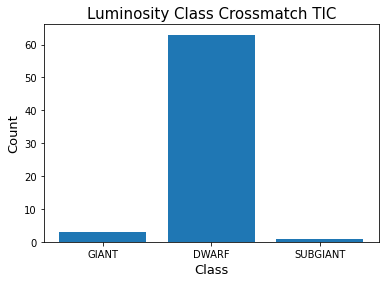

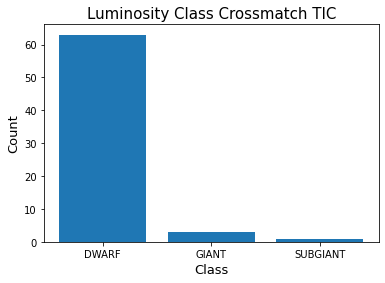

In [18]:
plt.title("Luminosity Class Crossmatch TIC", fontsize = 15)
plt.bar(counter.keys(), counter.values())
plt.ylabel("Count", fontsize = 13)
plt.xlabel("Class", fontsize = 13)
plt.show()

plt.title("Luminosity Class Crossmatch TIC", fontsize = 15)
plt.bar(keys, values)
plt.ylabel("Count", fontsize = 13)
plt.xlabel("Class", fontsize = 13)
plt.show()

## Using SIMBAD

In [19]:
from astroquery.simbad import Simbad
# https://github.com/astropy/astroquery/blob/main/astroquery/simbad/data/votable_fields_dict.json
# http://simbad.cds.unistra.fr/guide/sim-fscript.htx
Simbad.add_votable_fields('plx') 
Simbad.add_votable_fields('diameter')
Simbad.add_votable_fields('sp')
Simbad.add_votable_fields('mk')


In [20]:
result_table = Simbad.query_object("HD 017163")
result_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,PLX_VALUE,Diameter_diameter,Diameter_Q,Diameter_unit,Diameter_error,Diameter_filter,Diameter_method,Diameter_bibcode,SP_TYPE,MK_ds,MK_mss,MK_Spectral_type,MK_bibcode,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,mas,,,,,,,,,,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,float64,float64,str1,str4,float64,str8,str8,str19,object,str2,str3,object,str19,int32
HD 17163,02 45 20.9065,+04 42 41.874,14,14,0.056,0.051,90,A,O,2020yCat.1350....0G,20.372,--,,,--,,,,kA8hA9mF0III,,,F0,1993yCat.3135....0C,1


In [21]:
len(target_names)

100

In [22]:


diameters_simbad = []
mk_simbad = []

for target in target_names:
    result_table = Simbad.query_object(target)
    diameters_simbad.append( result_table["Diameter_diameter"].value.data[0] )
    mk_simbad.append( result_table["MK_Spectral_type"].value.data[0] )

In [23]:
print(len(mk_simbad))
print(len(diameters_simbad))


100
100


In [24]:
SIMBAD = pd.DataFrame()
SIMBAD["Name"] = target_names
SIMBAD["diameter_simbad"] = diameters_simbad
SIMBAD["mk"] = mk_simbad
SIMBAD

,Name,diameter_simbad,mk
0,HD 102249,NaN,A7 V
1,HD 102776,NaN,B3V
2,HD 105211,NaN,F2 V
3,HD 105435,NaN,B1V
4,HD 106983,NaN,B3V
...,...,...,...
95,HD 074375,NaN,B1.5III
96,HD 074956,NaN,A1 Va(n)
97,HD 080007,NaN,A1 III-
98,HD 083446,NaN,A7 V


In [25]:
mk_copy =  SIMBAD["mk"].copy().values
mk_copy.sort()




In [26]:
print(len(mk_copy))
print(mk_copy)


100
['A0' 'A0' 'A0 . P:' 'A0 Va' 'A0IV' 'A0V' 'A0p' 'A1 III-' 'A1 IV-Vp...'
 'A1 Va(n)' 'A2' 'A2' 'A2' 'A2' 'A2 Va' 'A2.5 Va' 'A2V' 'A3' 'A3' 'A3'
 'A3' 'A3' 'A4V' 'A5' 'A5Vn' 'A6Vm' 'A7 V' 'A7 V' 'A7IV-V' 'A7V' 'A8V'
 'A9/F0III/IV' 'A9IV-Vn' 'Ap' 'B 9 P SI' 'B1' 'B1' 'B1' 'B1.5III' 'B1III'
 'B1V' 'B1Vne:' 'B2.5V' 'B2/5' 'B2III' 'B2V+B3V' 'B3' 'B3' 'B3' 'B3V'
 'B3V' 'B3V' 'B3V' 'B4V' 'B4V' 'B5V' 'B5V' 'B6Ve' 'B7Vn' 'B8 V' 'B8V'
 'B9.5V' 'B9IV' 'B9V' 'DELTA DEL' 'F0' 'F0' 'F0' 'F0' 'F0 IV'
 'F0+ V ({lambda} Boo)...' 'F0V' 'F0p' 'F1 V' 'F1V' 'F2' 'F2 III' 'F2 V'
 'F2III-IV' 'F2IV' 'F3 V Fe-1.0' 'F3V' 'F4 V' 'F5' 'F5 V Fe-0.7 CH-0.5'
 'F5V' 'F8V' 'G0V' 'G2 V' 'G2V' 'G5V' 'K0+IV' 'K1' 'K2 IV C2+1 **' 'K2V'
 'K3V' 'K7V' 'O 0 III((F))' 'kA4hA9mA9 V' 'kA6hF0mF2']


In [27]:

counter_mk = {}
for mk in mk_copy:
    if (mk[0:2] not in counter_mk):
        counter_mk[mk[0:2]] = 1
    else: 
        counter_mk[mk[0:2]] += 1

In [28]:
counter_mk

{'A0': 7,
 'A1': 3,
 'A2': 7,
 'A3': 5,
 'A4': 1,
 'A5': 2,
 'A6': 1,
 'A7': 4,
 'A8': 1,
 'A9': 2,
 'Ap': 1,
 'B ': 1,
 'B1': 7,
 'B2': 4,
 'B3': 7,
 'B4': 2,
 'B5': 2,
 'B6': 1,
 'B7': 1,
 'B8': 2,
 'B9': 3,
 'DE': 1,
 'F0': 8,
 'F1': 2,
 'F2': 5,
 'F3': 2,
 'F4': 1,
 'F5': 3,
 'F8': 1,
 'G0': 1,
 'G2': 2,
 'G5': 1,
 'K0': 1,
 'K1': 1,
 'K2': 2,
 'K3': 1,
 'K7': 1,
 'O ': 1,
 'kA': 2}

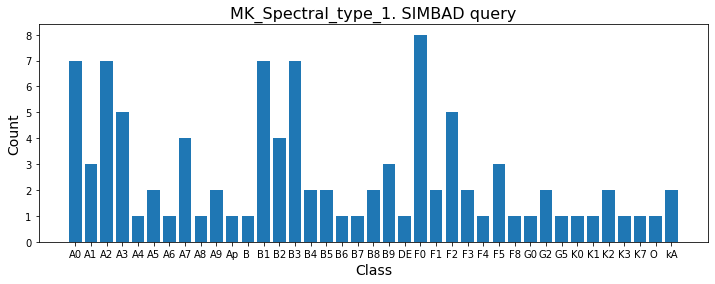

In [29]:
plt.figure(figsize=(12, 4))

plt.title("MK_Spectral_type_1. SIMBAD query", size = 16)
plt.bar(counter_mk.keys(), counter_mk.values())
plt.xlabel("Class", size = 14)
plt.ylabel("Count", size = 14)
plt.show()

Tenemos tipos A, B, F, G, K, O. Mayoritariamente tipos A, B y F

In [30]:

counter_mk = {}
for mk in mk_copy:
    if (mk[0] not in counter_mk):
        counter_mk[mk[0]] = 1
    else: 
        counter_mk[mk[0]] += 1

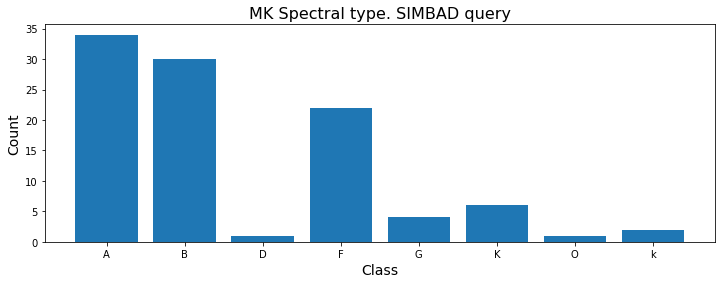

In [31]:
plt.figure(figsize=(12, 4))

plt.title("MK Spectral type. SIMBAD query", size = 16)
plt.bar(counter_mk.keys(), counter_mk.values())
plt.xlabel("Class", size = 14)
plt.ylabel("Count", size = 14)

plt.show()

In [32]:
def earth2jupiter_radii(earth_radii):
    return earth_radii*R_earth/R_jup

def jupiter2earth_radii(jupiter_radii):
    return jupiter_radii*R_jup/R_earth

In [33]:
print(earth2jupiter_radii(10))
print(earth2jupiter_radii(22))

print(jupiter2earth_radii(1))

0.8921417781010462
1.9627119118223018
11.20898073093868


In [34]:
# A class (Confirmed Planet, Planet Candidate) 10-22 Radius earth
print("10 R_earth: ", earth2jupiter_radii(10))
print("22 R_earth: ",earth2jupiter_radii(22))
print()

# F class (Confirmed Planet, Planet Candidate) 10-21 Radius earth
print("10 R_earth: ",earth2jupiter_radii(10))
print("21 R_earth: ",earth2jupiter_radii(21))


10 R_earth:  0.8921417781010462
22 R_earth:  1.9627119118223018

10 R_earth:  0.8921417781010462
21 R_earth:  1.8734977340121972


## About aos (earth-sun reference)

In [35]:
#au

print(1.0000010178*au/R_sun)
print(1*au/R_sun)

215.0323745302757
215.03215567054764


### About semi-major-axis

In [36]:
# por ejemplo, para aos = 10 y radio 1 R_sun
# 10 = a/r_sun 
# 10*r_sun = a

print(10*R_sun)
print(30*R_sun)


6957000000.0 m
20871000000.0 m
